### IMPORTS

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Split Data to Train & Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### ***Method 3: Adaboost Classifier***

Generally, decision tree-based algorithms perform well on imbalanced datasets. Similarly bagging and boosting based techniques are good choices for imbalanced classification problems.

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

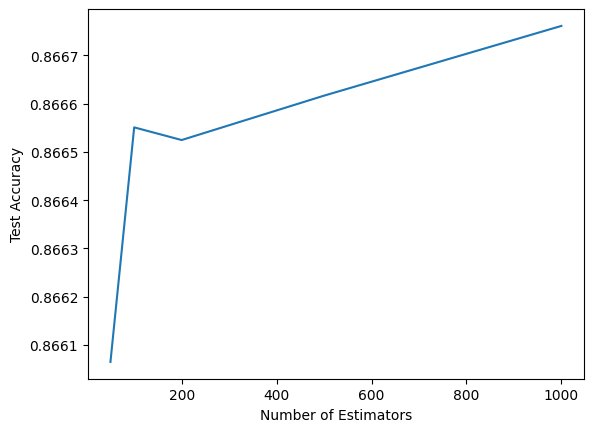

In [ ]:
# Machine Learning Method 3: Adaboost Classifier

n_estimators_options = [50, 100, 200, 500, 1000] # try different number of estimators

test_accuracies = [] # the accuracy of the final model for each number of estimator

# loop on all the different options for the number of estimators
# the default base classifier is the decision tree
for n_estimators in n_estimators_options:

    # create the adaboost classifies with the current number of estimators
    model = AdaBoostClassifier(n_estimators=n_estimators)

    # fit the model => training
    model.fit(X_train, Y_train)

    # calculate the accuracy of the model on the test set
    test_accuracy = accuracy_score(Y_test, model.predict(X_test))
    test_accuracies.append(test_accuracy)

# plot the test accuracies for each number of estimators
plt.plot(n_estimators_options, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
print("Test Accuracies" ,test_accuracies)
# Note: The accuracies are not very different for different number of estimators

Test Accuracies [0.8660648586145275, 0.8665510354252076, 0.8665247555976032, 0.8666167349942184, 0.8667612740460423]


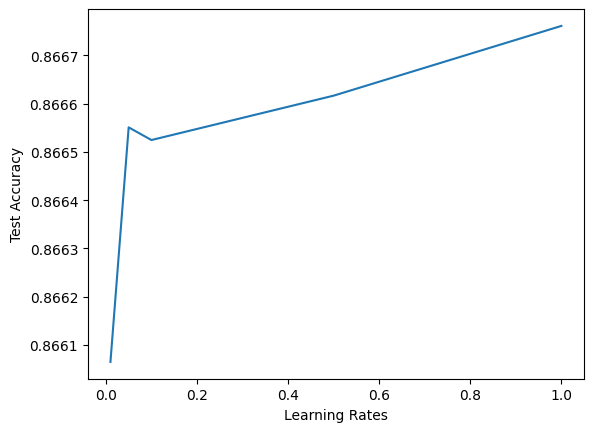

Test Accuracies [0.8660648586145275, 0.8665510354252076, 0.8665247555976032, 0.8666167349942184, 0.8667612740460423]


In [ ]:
# Try differen learning rates
n_estimators = 100 # use 100 estimators
learning_rate_options = [0.01, 0.05, 0.1, 0.5, 1] # try different learning rates => how much each model contributes to the final prediction 

test_accuracies_lr = []

for learning_rate in learning_rate_options:
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, Y_train)
    test_accuracy = accuracy_score(Y_test, model.predict(X_test))
    test_accuracies_lr.append(test_accuracy)


# plot the test accuracies for each number of estimators
plt.plot(learning_rate_options, test_accuracies)
plt.xlabel('Learning Rates')
plt.ylabel('Test Accuracy')
plt.show()

print("Test Accuracies" ,test_accuracies)

In [ ]:
# split the original dataset 
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

Train Accuracy:  0.8629375591296121
Test Accuracy:  0.8639230526647745
Confusion Matrix: 
 [[64188  1417]
 [ 8939  1560]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



<Axes: >

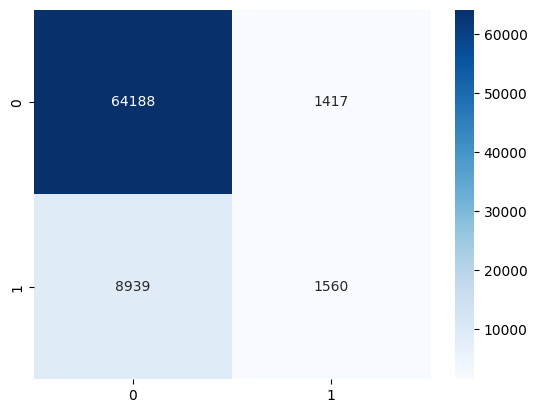

In [ ]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(X_train, Y_train)

# Evaluate model
Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# plot the features importance
# feature_importance = model.feature_importances_
# plot_feature_importance(feature_importance)

#### Coments on the result:
It is clear that the problem is that the data is imbalanced and the accuracy metrics for the minority class (0) is affecting the total accuracy and f1 score of the model
=> Revisit data preprocessing <br> <br>

Without any data altering: <br>
Train Accuracy:  0.8629375591296121 <br> 
Test Accuracy:  0.8639230526647745 <br> <br>
Confusion Matrix: <br> 
 [[64188  1417] <br>
 [ 8939  1560]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104 <br>
weighted avg       0.83      0.86      0.83     76104 <br>

Comments: <br>
The recall of class 1 (diabetic - true positives) is very low which, in our case, is a problem since this means that it fails to correctly diagnose if a person is diabetic (hayah aw moot)
The precision is also relitavely low and consequently the f1 score <br>

To compensate this imbalance: <br>

1. First we try a over sampling technique called SMOTE (Synthetic Minority Over-Sampling Technique) which synthesizes new data for the minority class that based on the current data points. It finds tqo points from the minority class, and constructs new datapoints that are classified as diabetic until the dataset becomes balanced.


In [ ]:
# split the sampled dataset with SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Train Accuracy:  0.7445880647894604
Test Accuracy:  0.7463530812741888
Confusion Matrix: 
 [[46647 18947]
 [14281 51126]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.75    131001
weighted avg       0.75      0.75      0.75    131001



<Axes: >

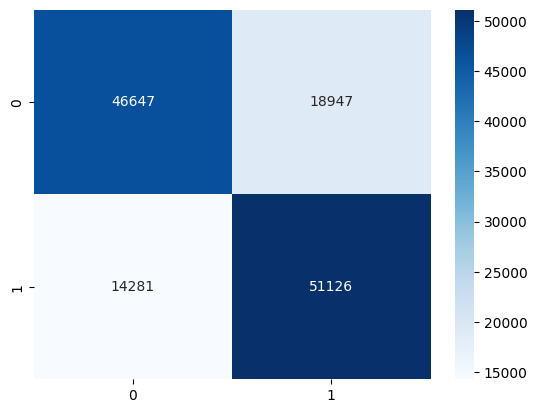

In [ ]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(X_train, Y_train)

# Evaluate model
Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Handling Imbalanced Data: <br>
1. Applying SMOTE (Synthetic Minority Over-Sampling Technique): <br>
Results: <br>
Train Accuracy:  0.7445880647894604 <br>
Test Accuracy:  0.7463530812741888 <br> <br>
Confusion Matrix: <br>
 [[46647 18947] <br>
 [14281 51126]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.75    131001 <br>
   macro avg       0.75      0.75      0.75    131001 <br>
weighted avg       0.75      0.75      0.75    131001 <br>

The recall, precision and f1 score for class 1 (diabetic) increased significantly on the other hand, the recall precision and f1 score of class 0 (non-diabetic decreased slightly) and the overall accuracy decreased by 10%. Over-Sampling also increases the chance of overfitting since it replicates minority class events.

In this case this could be a good thing since falsely diagnosing a non diabetic person is less severe than falsely diagnosing a diabetic person, however we will try to increase both by adjusting the loss function.
2. Adjusting the loss function to give more weight to missclassified smaples. The question is should this be done for the resampled or original data? استنونا في الحلقة القادمة

#### **Custom AdaBoost**

In [ ]:
# Using the custom AdaBoost to adjust the weights of the samples (loss function)
# Give even more weight to the samples that are misclassified
# trying with the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

In [ ]:
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 3]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, X_train, Y_train, X_test, Y_test, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.8616873901878632
Test Accuracy:  0.8632134973194576
Confusion Matrix: 
 [[64021  1584]
 [ 8826  1673]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     65605
           1       0.51      0.16      0.24     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.57      0.58     76104
weighted avg       0.83      0.86      0.83     76104



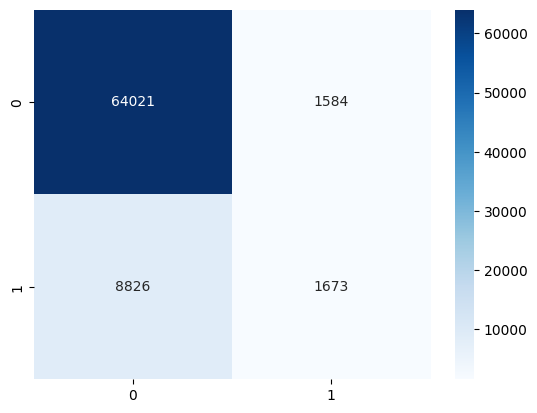

Train Accuracy:  0.8625996756318421
Test Accuracy:  0.8640018921475875
Confusion Matrix: 
 [[64310  1295]
 [ 9055  1444]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.53      0.14      0.22     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104



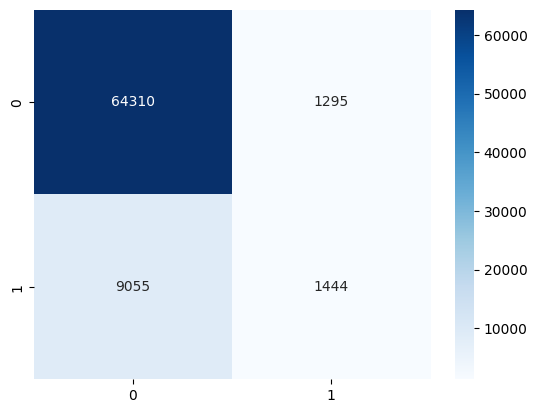

Train Accuracy:  0.8624082083164392
Test Accuracy:  0.863883632923368
Confusion Matrix: 
 [[64196  1409]
 [ 8950  1549]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



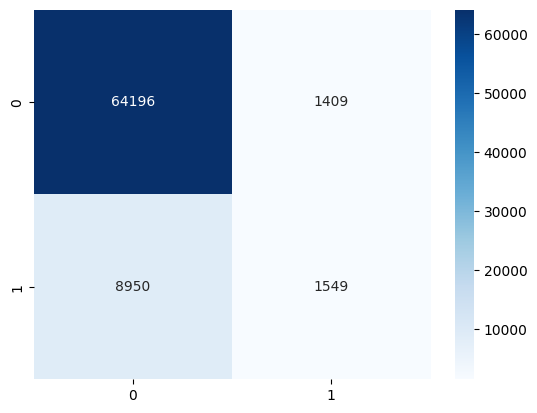

Train Accuracy:  0.8628305626886517
Test Accuracy:  0.8636602543887312
Confusion Matrix: 
 [[64212  1393]
 [ 8983  1516]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.14      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



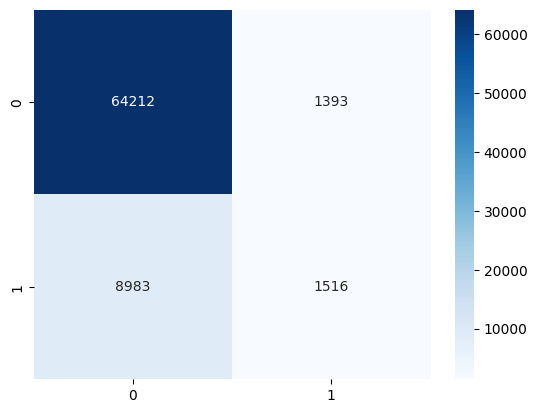

Train Accuracy:  0.8600768121818264
Test Accuracy:  0.8620440449910649
Confusion Matrix: 
 [[65605     0]
 [10499     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



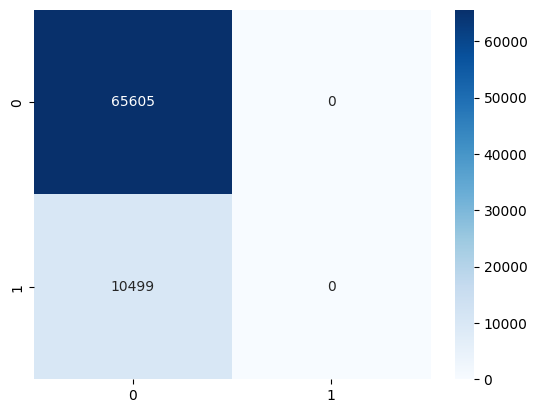

In [ ]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(Y_test, predicted_test)
    class_report = classification_report(Y_test, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

Increasing the weights => f1 score of the positive class = 0 ? => ***MULT***

In [ ]:
# trying on the resampled dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from custom_adaboost import * 
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 2.5]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, X_train, Y_train, X_test, Y_test, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.7406131509125944
Test Accuracy:  0.740376027663911
Confusion Matrix: 
 [[46747 18847]
 [15164 50243]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.77      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



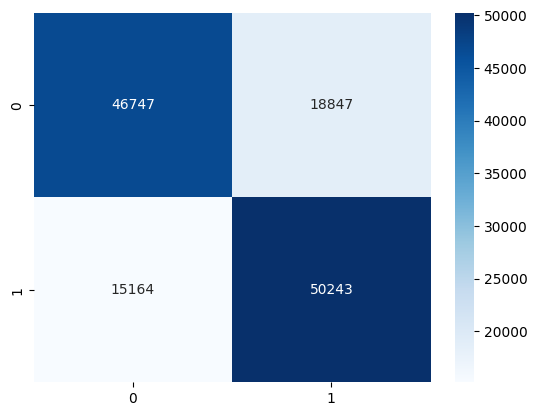

Train Accuracy:  0.7420624404989744
Test Accuracy:  0.742208074747521
Confusion Matrix: 
 [[46347 19247]
 [14524 50883]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



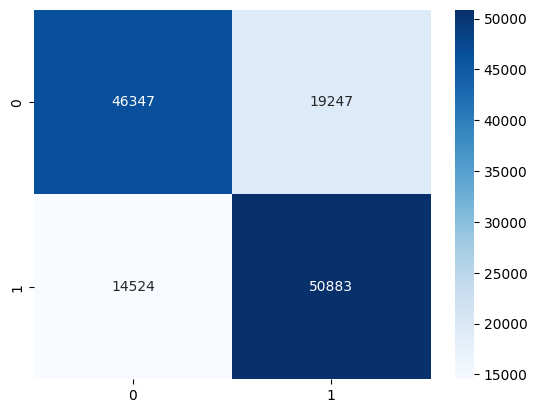

Train Accuracy:  0.7416502272080401
Test Accuracy:  0.7413378523828063
Confusion Matrix: 
 [[47141 18453]
 [15432 49975]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74     65594
           1       0.73      0.76      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



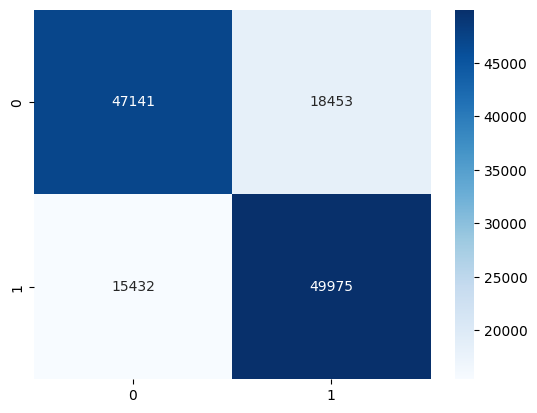

Train Accuracy:  0.7448792313203584
Test Accuracy:  0.7444523324249434
Confusion Matrix: 
 [[46189 19405]
 [14072 51335]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.75      0.74      0.74    131001
weighted avg       0.75      0.74      0.74    131001



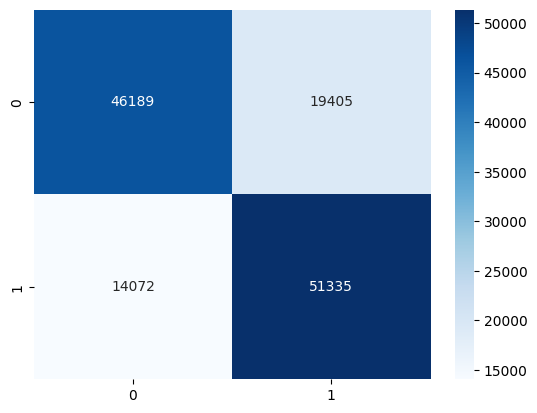

Train Accuracy:  0.745710200970337
Test Accuracy:  0.7454065236143236
Confusion Matrix: 
 [[46179 19415]
 [13937 51470]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.79      0.76     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.74    131001
weighted avg       0.75      0.75      0.74    131001



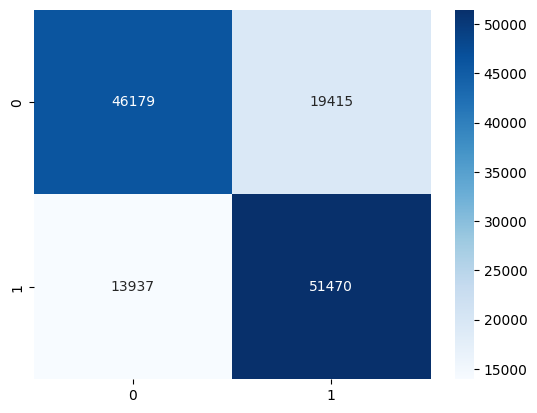

In [ ]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(Y_test, predicted_test)
    class_report = classification_report(Y_test, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

Both sklearn and own implementation of the classifier provide almost the same accuracies
We can try the adaboost classifier with a stronger classifier than the DecisionTreeClassifier


### AdaBoost With SVM as a base classifier

In [ ]:
# split the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

# Try the adaboost classifier with SVM model as the base classifier
adaboost_svm = AdaBoostClassifier(base_estimator=SVC(class_weight='balanced', probability=True), n_estimators=50, learning_rate=1)

# train model
adaboost_svm.fit(X_train, Y_train)

# Predict
Y_predicted_train = adaboost_svm.predict(X_train)
Y_predicted_test = adaboost_svm.predict(X_test)

In [ ]:
# Evaluate model
train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

conf_matrix = confusion_matrix(Y_test, predicted_test)
class_report = classification_report(Y_test, predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)
# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()